## Data Load

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image 
import glob
import os

In [3]:
# 사이즈 변경
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일 사이즈로 바꾸어 저장
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all/all_paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료")


1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료
1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료
1271  images to be resized.
1271  images resized.
보 이미지 resize 완료


In [4]:
# 데이터 라벨링 및 분리
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/all_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/all_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/all_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_scissor_paper/all"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 64, 64, 3)
y_train shape: (3676,)


라벨:  1


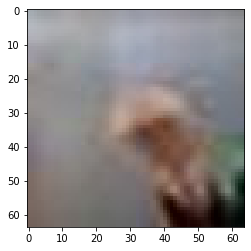

In [5]:
# 라벨링 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[1230])
print('라벨: ', y_train[1230])

## Baseline

In [6]:
# modeling
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

Epoch 1/10
115/115 [==============================] - 13s 111ms/step - loss: 3.9816 - accuracy: 0.7821
Epoch 2/10
115/115 [==============================] - 13s 109ms/step - loss: 0.0360 - accuracy: 0.9908
Epoch 3/10
115/115 [==============================] - 13s 109ms/step - loss: 0.0065 - accuracy: 0.9992
Epoch 4/10
115/115 [==============================] - 13s 111ms/step - loss: 8.4597e-04 - accuracy: 1.0000
Epoch 5/10
115/115 [==============================] - 13s 110ms/step - loss: 4.2896e-04 - accuracy: 1.0000
Epoch 6/10
115/115 [==============================] - 13s 109ms/step - loss: 2.5446e-04 - accuracy: 1.0000
Epoch 7/10
115/115 [==============================] - 13s 110ms/step - loss: 1.7238e-04 - accuracy: 1.0000
Epoch 8/10
115/115 [==============================] - 13s 109ms/step - loss: 1.2425e-04 - accuracy: 1.0000
Epoch 9/10
115/115 [==============================] - 13s 109ms/step - loss: 8.6802e-05 - accuracy: 1.0000
Epoch 10/10
115/115 [============================

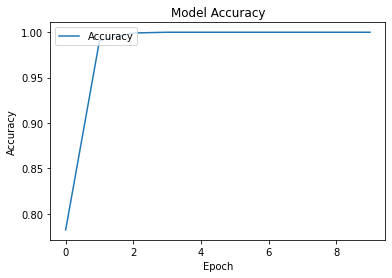

In [7]:
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 훈련 과정에서의 정확도를 그래프로 표시
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [8]:
# test data
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

def test_load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_test, y_test)=test_load_data(image_dir_path)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

635  images to be resized.
635  images resized.
675  images to be resized.
675  images resized.
648  images to be resized.
648  images resized.
학습데이터(x_train)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 64, 64, 3)
y_test shape: (1958,)


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 2s - loss: 5.3966 - accuracy: 0.4423
test_loss: 5.396564960479736 
test_accuracy: 0.44228804111480713


In [11]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.636940e-13 1.000000e+00 9.550211e-11]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [9.7899467e-01 1.5775124e-04 2.0847486e-02]
라벨: 2, 예측결과: 0


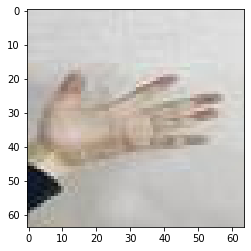

예측확률분포: [0.7369468  0.00417408 0.25887913]
라벨: 2, 예측결과: 0


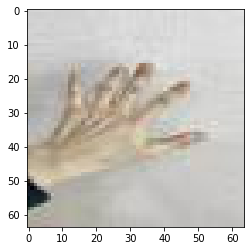

예측확률분포: [0.06348763 0.00610266 0.9304098 ]
라벨: 1, 예측결과: 2


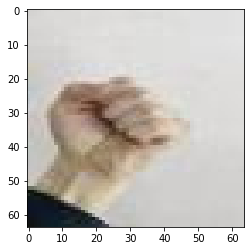

예측확률분포: [5.6208259e-01 1.3526211e-06 4.3791613e-01]
라벨: 1, 예측결과: 0


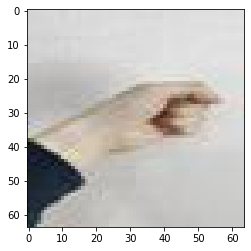

예측확률분포: [3.9660907e-15 1.0000000e+00 3.7966399e-14]
라벨: 2, 예측결과: 1


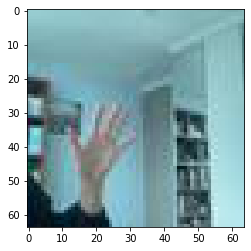

예측확률분포: [1.3523484e-03 1.8978687e-06 9.9864572e-01]
라벨: 0, 예측결과: 2


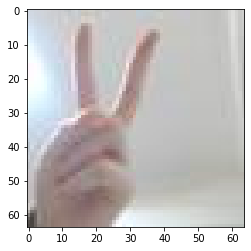

예측확률분포: [3.9093805e-18 2.1984968e-21 1.0000000e+00]
라벨: 0, 예측결과: 2


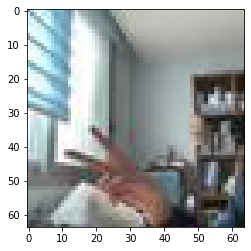

예측확률분포: [1.6700434e-03 2.2609006e-06 9.9832767e-01]
라벨: 1, 예측결과: 2


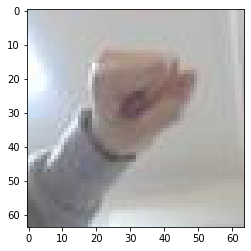

예측확률분포: [1.1922409e-01 2.2452102e-06 8.8077366e-01]
라벨: 1, 예측결과: 2


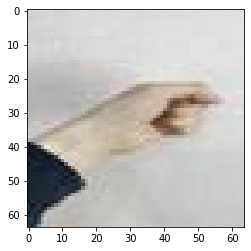

예측확률분포: [0.6990238  0.00446449 0.29651177]
라벨: 2, 예측결과: 0


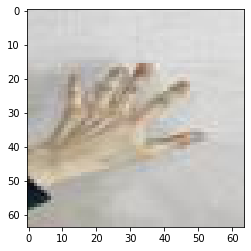

In [12]:
# 오답 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

테스트 결과는 0.44로 생각보다는 높은 점수가 나왔습니다. <br/>
<br/>
Epoch 2에서부터 accuracy가 1에 가까워져 과적합이 의심됩니다.

## Tuning_1

channel만 높여보겠습니다.
- n_channel_1=25 <br/>
- n_channel_2=50 <br/>



In [15]:
# modeling
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=25
n_channel_2=50
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 25)        700       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 25)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 50)        11300     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                313632    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

Epoch 1/10
115/115 [==============================] - 20s 174ms/step - loss: 8.8316 - accuracy: 0.7576
Epoch 2/10
115/115 [==============================] - 20s 176ms/step - loss: 0.0638 - accuracy: 0.9810
Epoch 3/10
115/115 [==============================] - 20s 175ms/step - loss: 0.0196 - accuracy: 0.9932
Epoch 4/10
115/115 [==============================] - 20s 175ms/step - loss: 0.2024 - accuracy: 0.9328
Epoch 5/10
115/115 [==============================] - 20s 177ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 6/10
115/115 [==============================] - 20s 174ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 7/10
115/115 [==============================] - 20s 177ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 8/10
115/115 [==============================] - 20s 176ms/step - loss: 1.9031e-04 - accuracy: 1.0000
Epoch 10/10
115/115 [==============================] - 20s 178ms/step - loss: 1.4827e-04 - accuracy: 1.0000


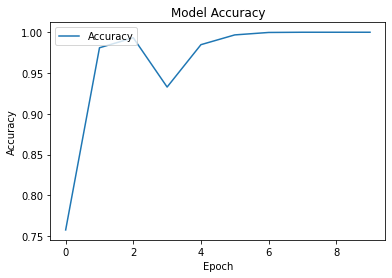

In [16]:
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 훈련 과정에서의 정확도를 그래프로 표시
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 3s - loss: 8.1705 - accuracy: 0.3636
test_loss: 8.170454978942871 
test_accuracy: 0.3636363744735718


In [18]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.5916784e-19 3.4490170e-25 1.0000000e+00]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [4.1743084e-03 5.7425732e-05 9.9576831e-01]
라벨: 0, 예측결과: 2


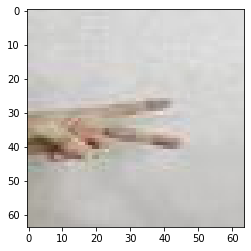

예측확률분포: [1.5250001e-07 4.8499107e-03 9.9514991e-01]
라벨: 1, 예측결과: 2


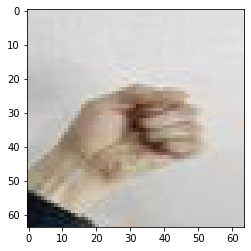

예측확률분포: [0.01263909 0.97675896 0.01060195]
라벨: 2, 예측결과: 1


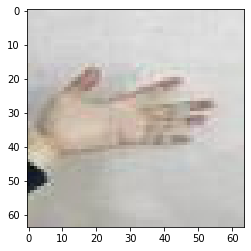

예측확률분포: [1.2541394e-27 0.0000000e+00 1.0000000e+00]
라벨: 0, 예측결과: 2


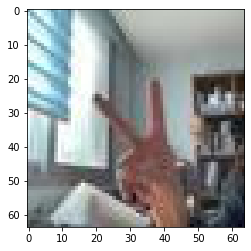

예측확률분포: [7.2706086e-08 4.3734840e-01 5.6265146e-01]
라벨: 1, 예측결과: 2


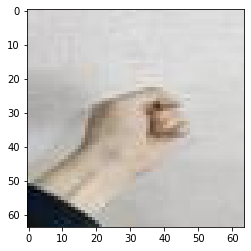

예측확률분포: [0.11827977 0.8711304  0.01058974]
라벨: 0, 예측결과: 1


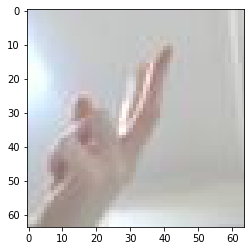

예측확률분포: [1.2438503e-16 1.7346142e-15 1.0000000e+00]
라벨: 1, 예측결과: 2


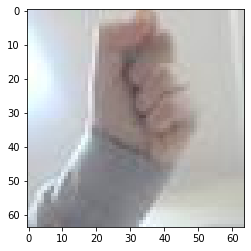

예측확률분포: [0.0914249  0.00574336 0.90283173]
라벨: 0, 예측결과: 2


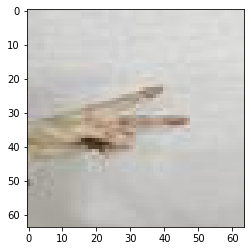

예측확률분포: [0.00081451 0.4718454  0.5273401 ]
라벨: 0, 예측결과: 2


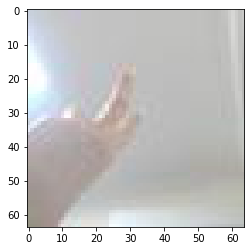

예측확률분포: [1.7084300e-03 5.3783646e-05 9.9823773e-01]
라벨: 0, 예측결과: 2


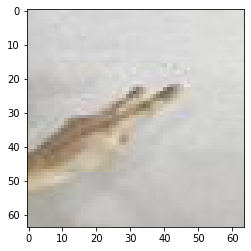

In [19]:
# 오답 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

baseline에 비해 훈련과정에서 accuracy가 천천히 상승하였으나 test_accuracy는 0.36으로 더 낮아졌습니다.

## Tuning_2

n_channel을 더욱 높여보겠습니다.
- n_channel_1=32
- n_channel_2=64

In [20]:
# modeling
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

Epoch 1/10
115/115 [==============================] - 23s 194ms/step - loss: 11.3453 - accuracy: 0.3545
Epoch 2/10
115/115 [==============================] - 22s 194ms/step - loss: 1.0978 - accuracy: 0.3504
Epoch 3/10
115/115 [==============================] - 23s 197ms/step - loss: 1.0973 - accuracy: 0.3504
Epoch 4/10
115/115 [==============================] - 22s 193ms/step - loss: 1.0970 - accuracy: 0.3504
Epoch 5/10
115/115 [==============================] - 22s 193ms/step - loss: 1.0969 - accuracy: 0.3504
Epoch 6/10
115/115 [==============================] - 22s 194ms/step - loss: 1.0968 - accuracy: 0.3504
Epoch 7/10
115/115 [==============================] - 22s 195ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 8/10
115/115 [==============================] - 22s 195ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 9/10
115/115 [==============================] - 22s 193ms/step - loss: 1.0967 - accuracy: 0.3504
Epoch 10/10
115/115 [==============================] - 22s 194ms/step - 

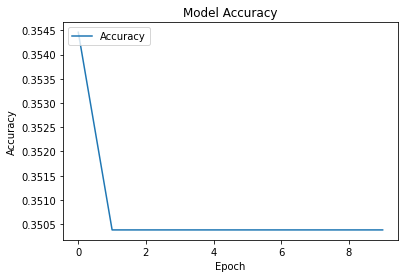

In [21]:
import matplotlib.pyplot as plt

# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련, 훈련 과정의 정보를 history에 저장
history = model.fit(x_train, y_train, epochs=n_train_epoch)

# 훈련 과정에서의 정확도를 그래프로 표시
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 3s - loss: 1.0993 - accuracy: 0.3447
test_loss: 1.0993156433105469 
test_accuracy: 0.34473952651023865


In [23]:
# 결과 값 탐색
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 탐색 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.30418718 0.34954152 0.34627128]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


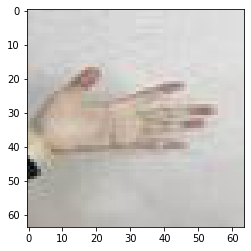

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


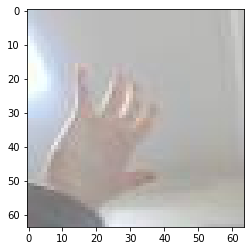

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 0, 예측결과: 1


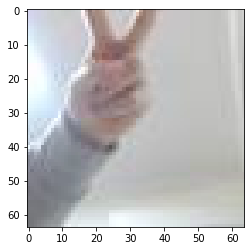

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 0, 예측결과: 1


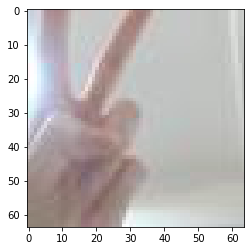

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 0, 예측결과: 1


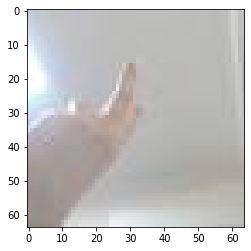

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


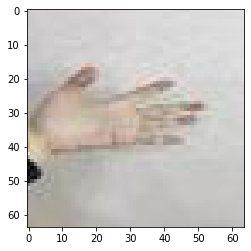

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


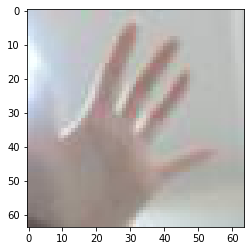

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


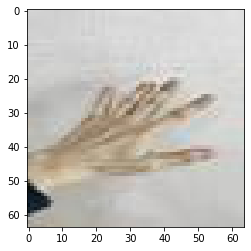

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 2, 예측결과: 1


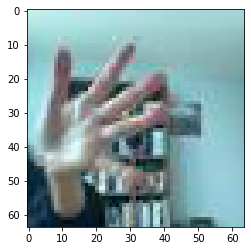

예측확률분포: [0.30418718 0.34954152 0.34627128]
라벨: 0, 예측결과: 1


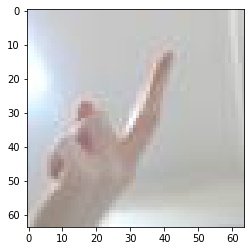

In [24]:
# 오답 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 append 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개 출력
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

훈련과정에서 accuracy가 0.3504에서 증가하지 않습니다.<br/>
test_accuracy도 0.34로 1/3 확률로 찍었을 때와 다르지 않아 예측력이 없는 것으로 보여집니다.

# 회고

이미지 사이즈는 32, 64, 128로 나누어 진행하였는데, 64가 가장 좋은 accuracy를 보였다. <br/>
일정 사이즈가 증가할 수록 디테일한 부분들까지 인식을 하기 때문이지 않을까?로 생각했다.<br/>
<br/>
그 다음은 channel을 조금씩 높여보았는데, channel이 높아짐에 따라 Epoch에서 학습이 더뎌지는 것을 확인할 수 있었다.<br/>
아직 각 파라미터의 모든 기능은 이해하지 못했지만 한개씩 실험해보며 모델의 성능이 달라지는 것은 체감할 수 있었지만 정확도는 높이지 못해 좀 더 각 파라미터를 어떻게 사용해야하는지 추가적인 공부가 필요할 것 같다.<br/>
<br/>
가위바위보를 낼 때 팔의 각도, 위치(오른쪽 대각선, 왼쪽 대각선), 손목이 얼마나 노출되는지 등의 영향이 큰 것으로 예상되며, 1/3 확률을 맞추는 분류였음에도 성능을 높이기 어려웠다.